<a href="https://colab.research.google.com/github/jeraldflowers/Countries-clustering/blob/main/Project_countries_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Country Segmentation Clustering Project by socio-economic Data


## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

## Data Load

In [2]:
df_country = pd.read_csv('/content/Country-data.csv')

In [3]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Handling null values

In [4]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

We note that we do not have null data.

## Validating Duplicates

In [5]:
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


We also see that there is no duplicate data.

## Distribution Analysis

Let's look at the distribution of our data to detect statistical outliers.

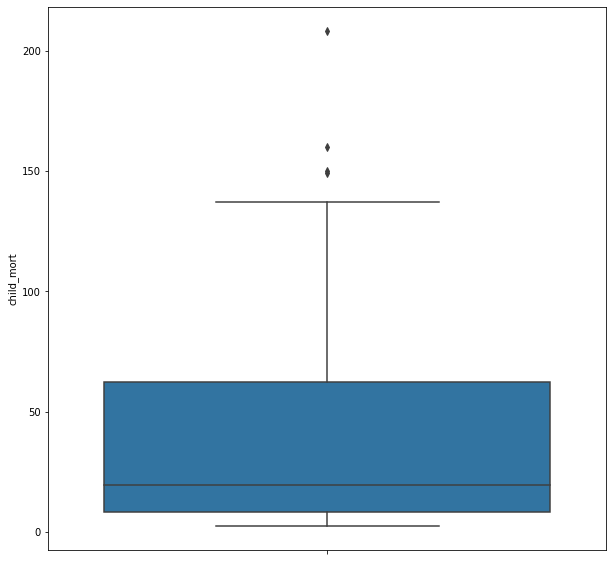

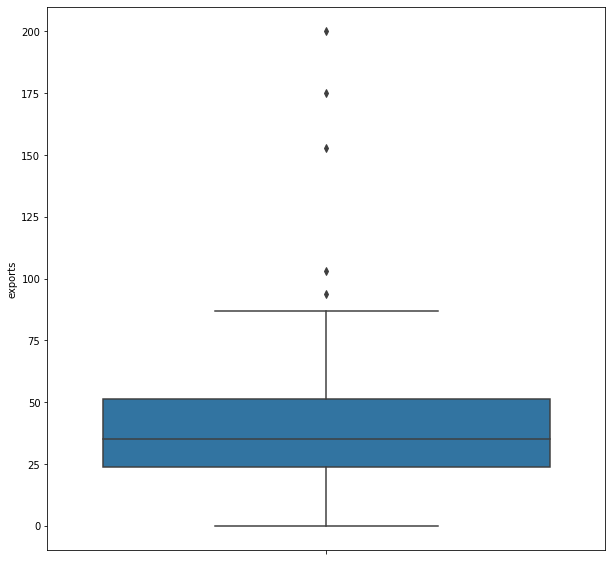

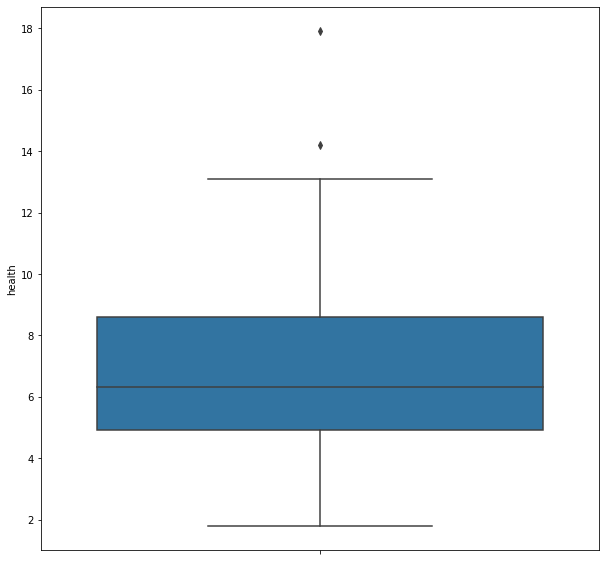

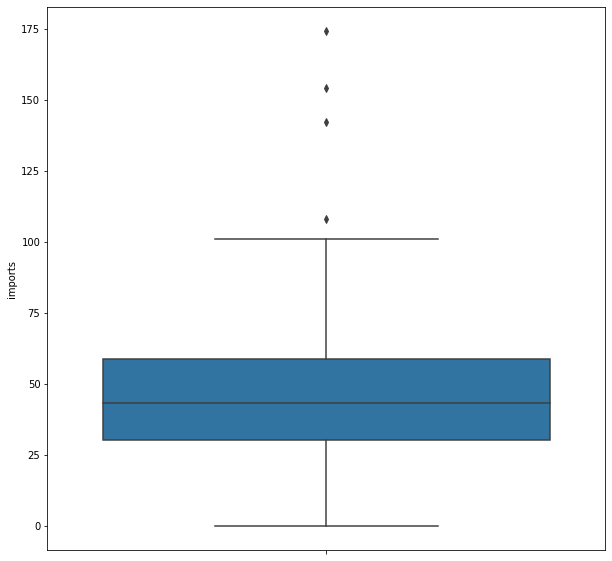

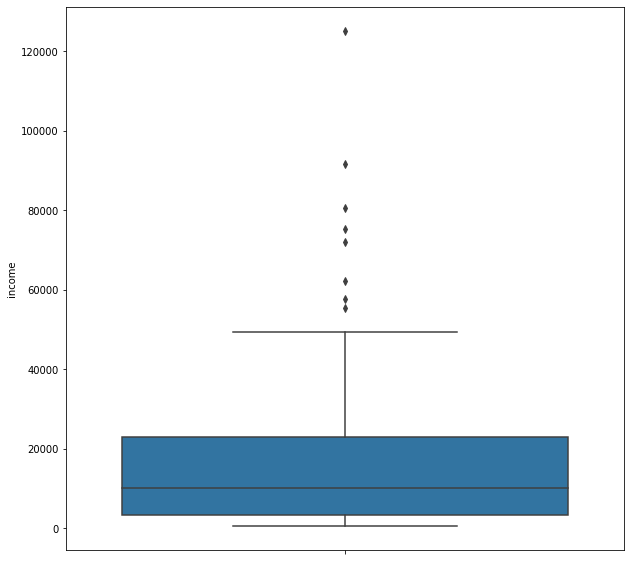

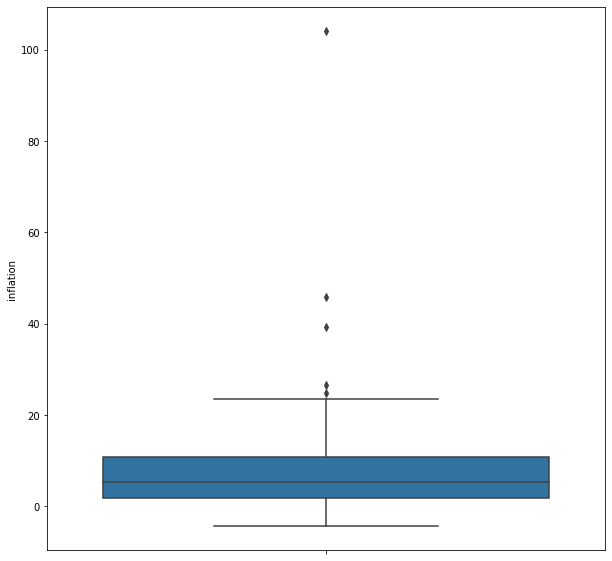

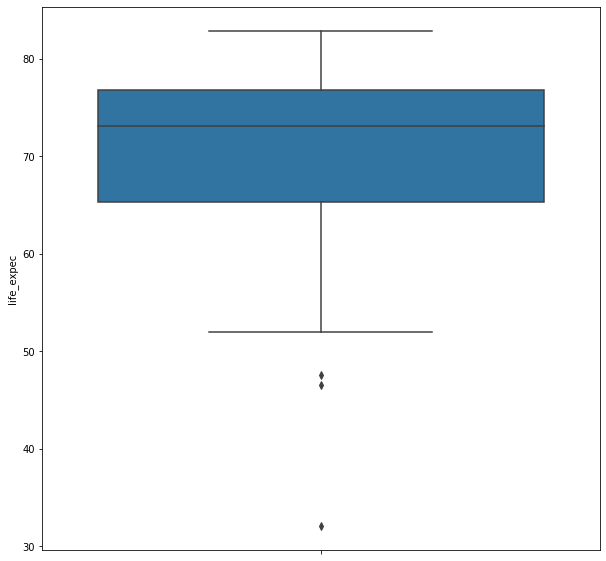

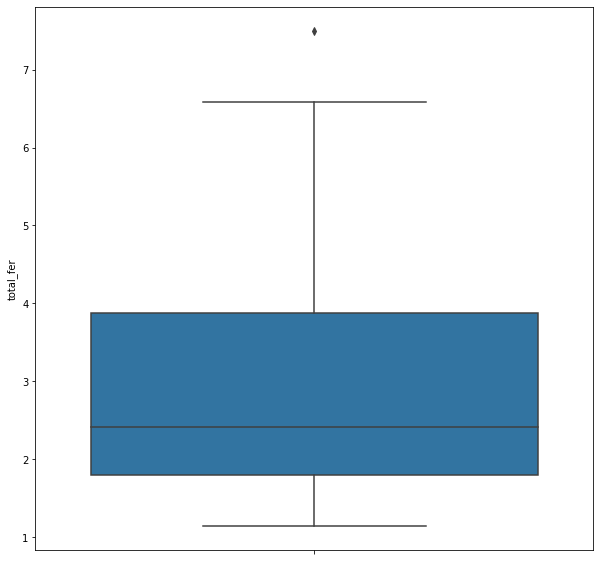

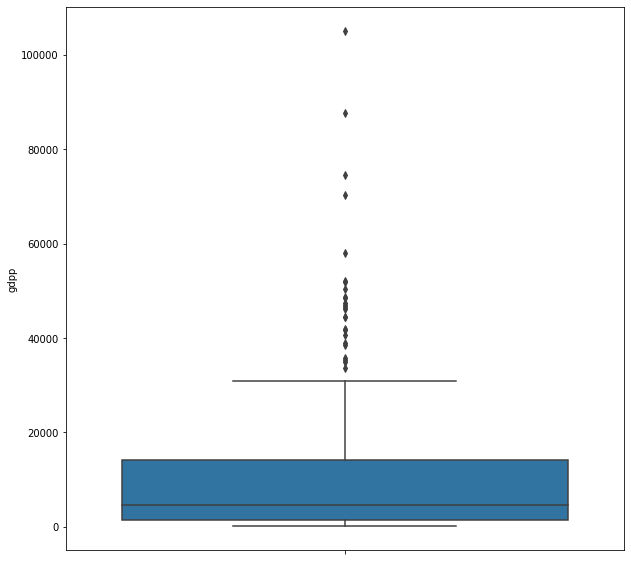

In [6]:
int_cols = df_country.select_dtypes(exclude='object').columns 
for _ in int_cols:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df_country, y= _)
    plt.show()

At first glance we detect a very high outlier compared to the rest that is in inflation. This outlier can interfere with certain algorithms, but it is part of the same economy of a certain country, so it would be unfair to separate it.
There are also very low life expectancies in certain countries.

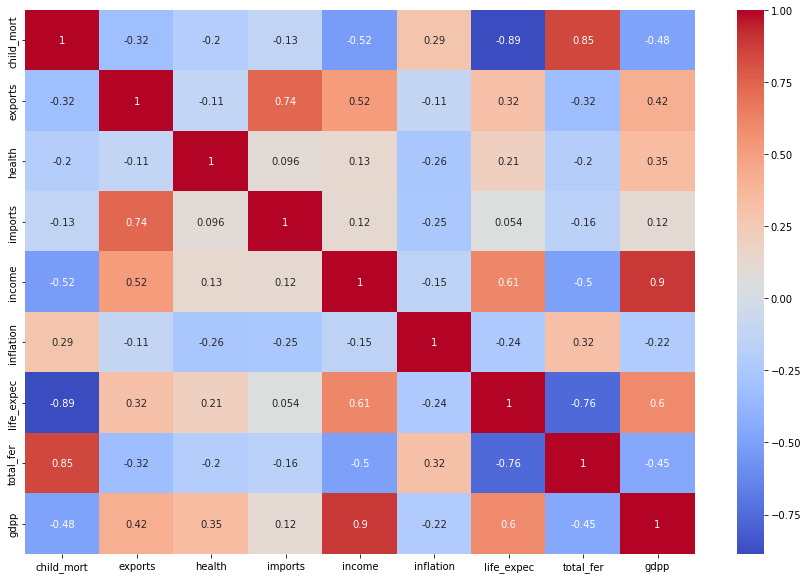

In [7]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_country.corr(), annot=True, cmap='coolwarm')
plt.show()

We see a high correlation between "income" and "gdpp". And negatives like "life_expec" and "total_fer". We are going to continue with the variables as is, since they are all being important.

## Scale Data

In [8]:
from sklearn.preprocessing import StandardScaler
scaaler = StandardScaler()
df_country_scaled = scaaler.fit_transform(df_country.drop('country',axis=1))

In [9]:
df_country_scaled = pd.DataFrame(df_country_scaled, columns = df_country.drop('country',axis=1).columns )

In [10]:
df_country_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## PCA

The PCA serves to reduce the dimensionality of our dataset, making it easier to handle but without losing data.

In [11]:
from sklearn.decomposition import PCA 

In [12]:
pca = PCA()
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [13]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


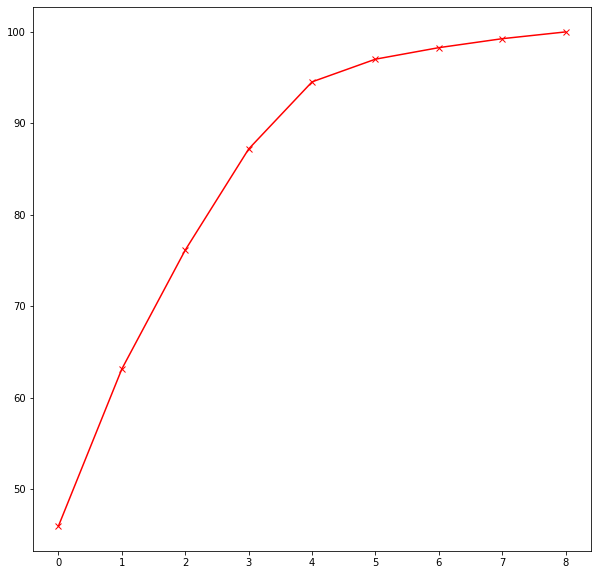

In [14]:
cum_var = np.cumsum(np.round(var, decimals=4)*100) 
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

The cumulative sum of variances shows me this graph and indicates that when I have four decimal components I already have almost 90% of the variables, with 5 components I have approximately 95% and so on. As our goal is to reduce dimensionality, we are going to break it down to four components. 

In [15]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8],axis=1, inplace=True)

In [16]:
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


## Importar Libraries for clustering

In [17]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## K-means

### PCA

In [18]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15) 
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard,y))

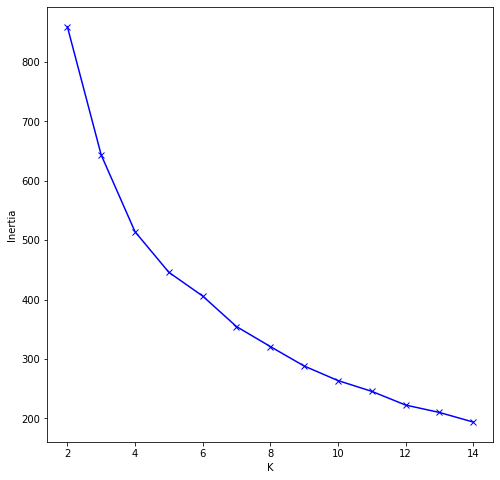

In [19]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

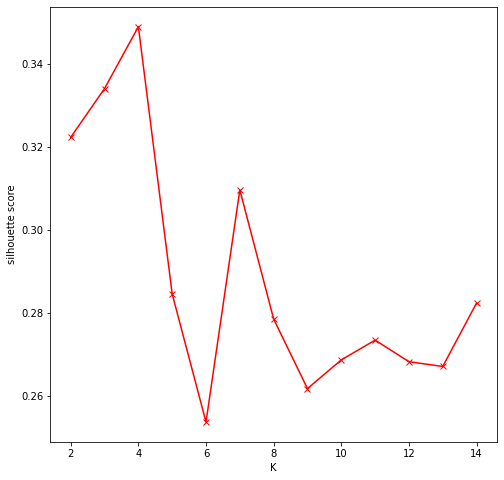

In [20]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

We can train our algorithm with 4 clusters.

In [21]:
km = KMeans(n_clusters = 4)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))
df_country['k_means_pca'] = y

0.3549131449906333


We have a silhouette index of 0.35.

### No PCA

In [22]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15) 
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(df_country_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_country_scaled,y))

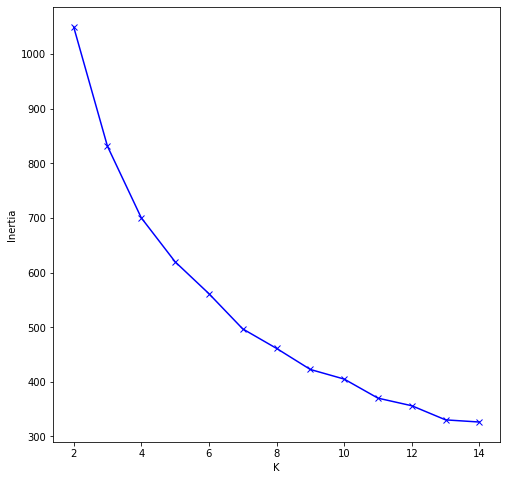

In [23]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

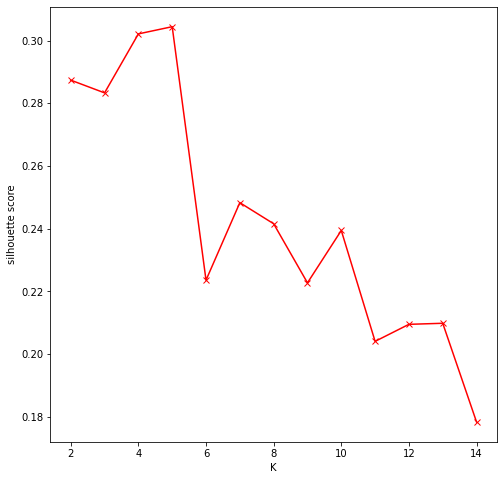

In [24]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In this case of the silhouette score, I find that 5 in this case has a much better coefficient.

In [25]:
km = KMeans(n_clusters = 5)
y = km.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y))
df_country['k_means'] = y

0.2992594995920442


It turns out to be a lower index.

## Agglomerativen hierarchical clustering

### PCA

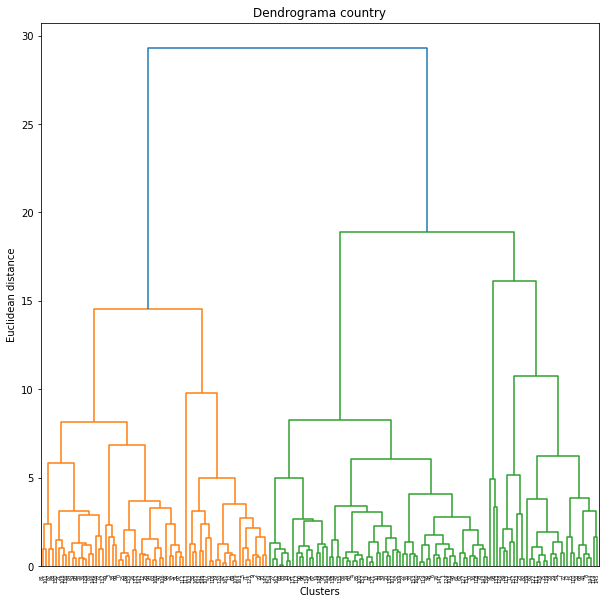

In [26]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_standard, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [27]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_hc ))
df_country['hc_pca'] = y_hc

0.3070110704080526


### No PCA

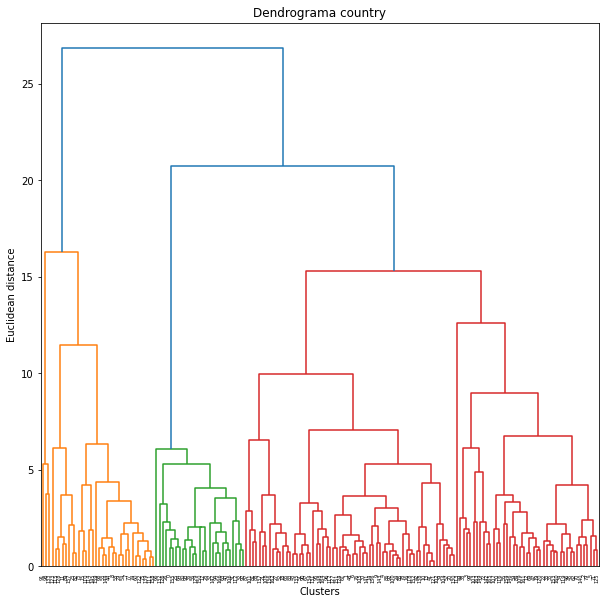

In [28]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_country_scaled, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [29]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_hc ))
df_country['hc'] = y_hc

0.3153134331018189


## DBSCAN

### PCA

In [30]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, indices = neighbors_fit.kneighbors(pca_data_standard)

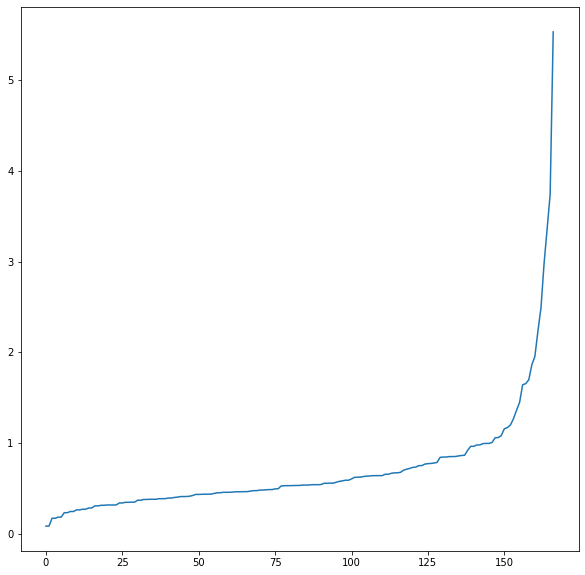

In [31]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

This graph (of knee) we can say that it is iterating between 0.5 and 2.

In [56]:
eps_values = np.arange(0.5, 2.0, 0.10)
min_samples = np.arange(3,12)

In [57]:
from itertools import product 
dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_score.append(silhouette_score(pca_data_standard,y_dbscan))
    except:
        sil_score.append(0)    
    no_of_clusters.append(len(np.unique(y_dbscan)))


In [58]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [59]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

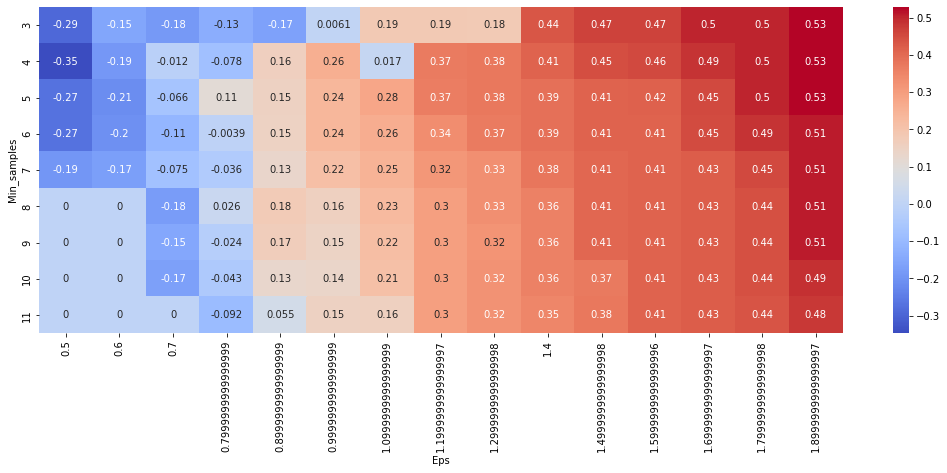

In [60]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

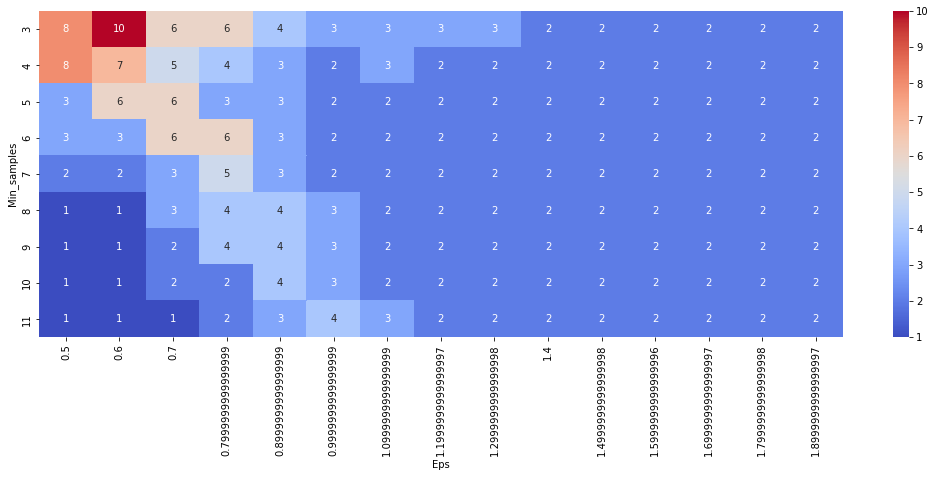

In [61]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [62]:
dbscan_train = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_dbscan ))
df_country['dbscan_pca'] = y_dbscan

0.18591175730784373


The result 0.18 is not a very good prediction but let's see how it behaves without PCA.

### No PCA

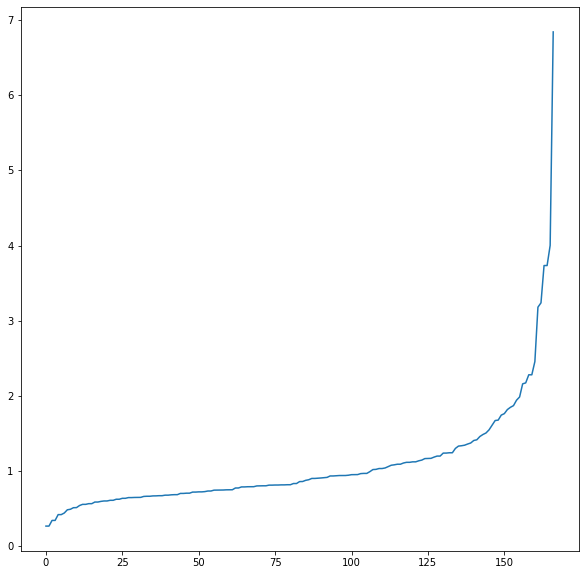

In [39]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_country_scaled)
distances, indices = neighbors_fit.kneighbors(df_country_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

This graph (of knee) we can say that it is iterating between 1 and 3, it is the range between where we are going to look for the epsilon based on the order of the distances.

In [40]:
eps_values = np.arange(1, 3.0, 0.10)
min_samples = np.arange(3,12)

In [41]:
from itertools import product 
dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_country_scaled)
    try:
        sil_score.append(silhouette_score(df_country_scaled,y_dbscan))
    except:
        sil_score.append(0)    
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [42]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [43]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

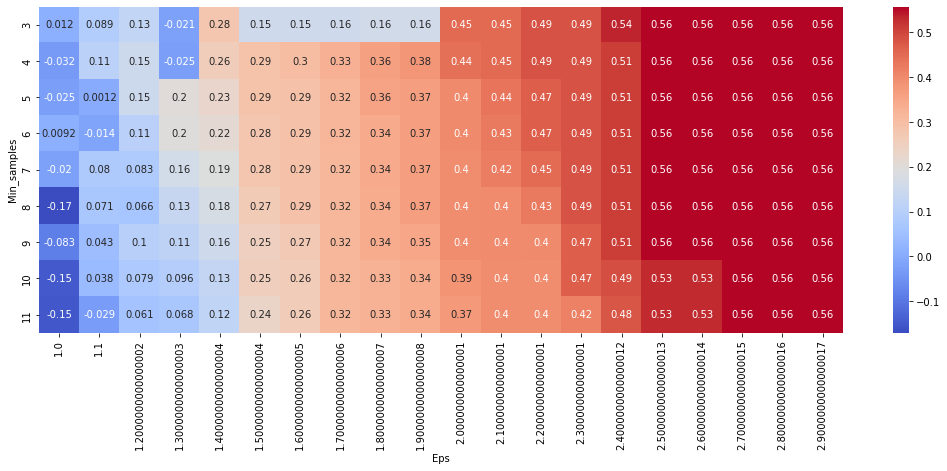

In [44]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

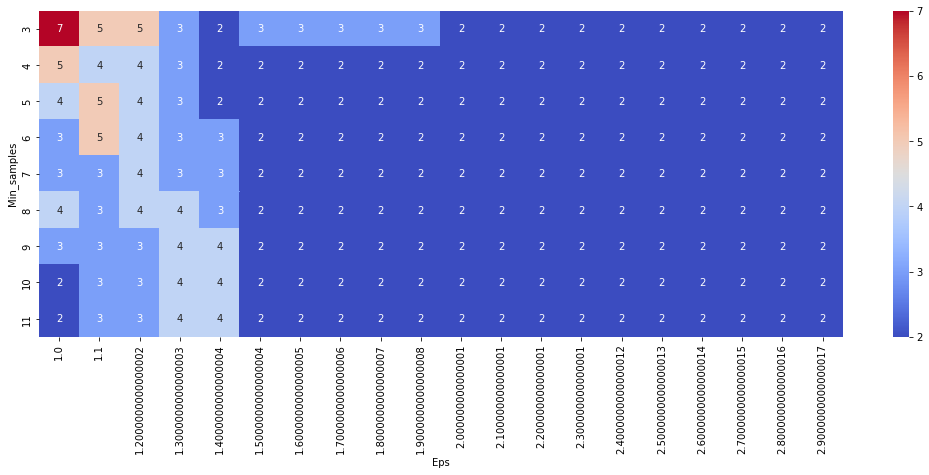

In [45]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [46]:
dbscan_train = DBSCAN(eps=1.7, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_dbscan ))
df_country['dbscan_cluster'] = y_dbscan

0.1563549566374231


In [47]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,1,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,1,1,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0,1,0,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,1,0,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,1,1,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,1,0,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,0,1,0,0,0


## Evaluation of Results

In [48]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca',
       'k_means', 'hc_pca', 'hc', 'dbscan_pca', 'dbscan_cluster'],
      dtype='object')

In [49]:
df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


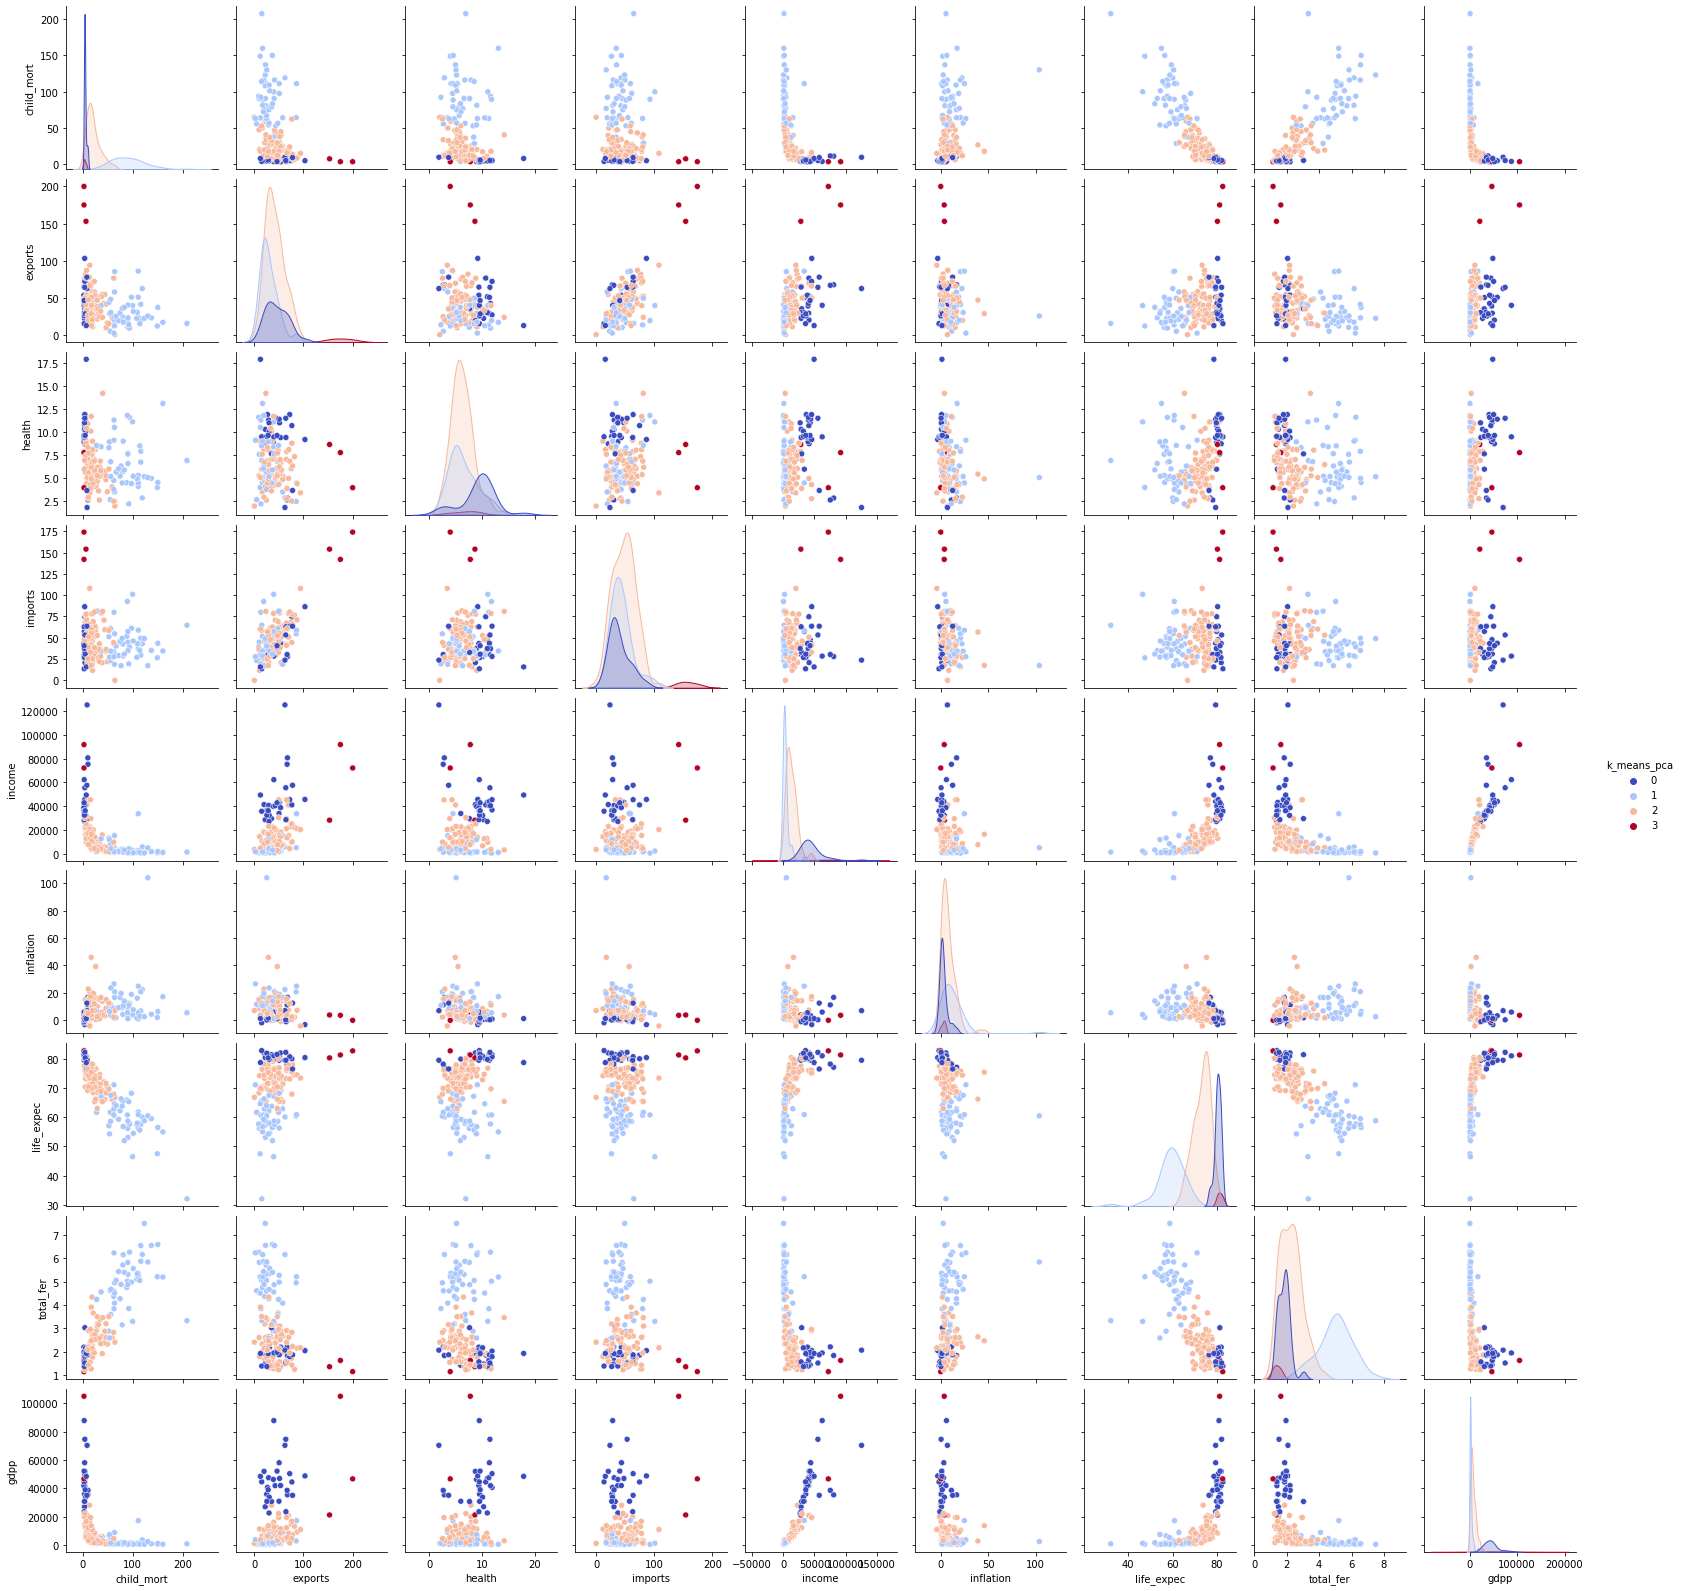

In [50]:
sns.pairplot(data = df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']], hue='k_means_pca', palette='coolwarm')

In [51]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,1,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,1,1,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0,1,0,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,1,0,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,1,1,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,1,0,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,0,1,0,0,0


We choose to analyze the "child-mort" versus the "gdpp".

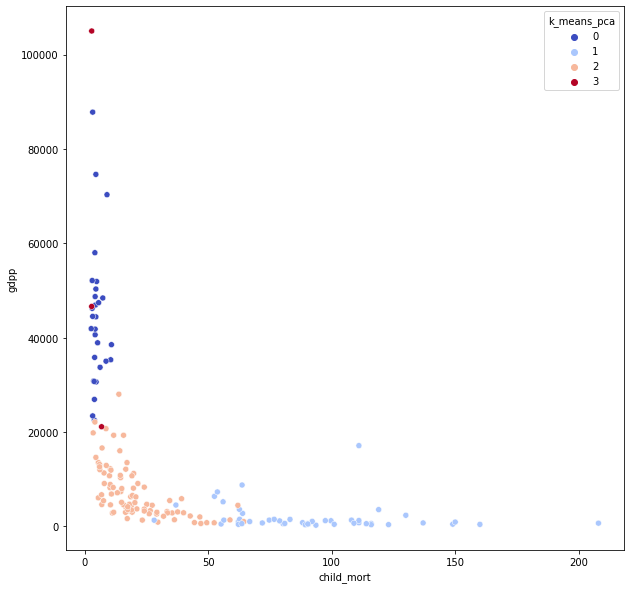

In [52]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_country, x='child_mort', y='gdpp',hue='k_means_pca', palette='coolwarm')
plt.show()

In [53]:
df_country[df_country['k_means_pca']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3,2,0,1,-1,-1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3,2,0,1,-1,-1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3,2,0,1,-1,-1
